## PART 1 - CROSS-SECTION DATA
---
#### **1. State the fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators are unbiased.** 

Firstly, let $y$ and $x$ be two variables representing some population and, since the goal is to state the dependent variable $y$ in terms of the explanatory variable $x$, we write the simple linear regression model:

$$
y = \beta_{0} + \beta_{1} x + u,
$$

where the variable $u$ is the disturbance term, standed as well for the unobserved variable, which measures the effect of the change in $y$ with $x$ being unobserved. Moreover, $\beta_{0}$ is the intercept parameter and $\beta_{1}$ is called the slope parameter, because, considering $u$ fixed, then $\Delta u = 0$, and the variation of $y$ is linear with variation of $x$, *i.e.*,

$$
\Delta y = \beta_{1} \Delta x.
$$

In order to compute the estimators of $\beta_{0}$ and $\beta_{1}$, it is necessary to know the relation beteween the variables $u$ and $x$. To that, we can fist assume that the average alue of $u$ is zero, *i.e.*, 

$$
E(u) = 0.
$$

Defining the the coditional distribution of $u$ given $x$ and assuming that the average of $u$ does not depend on the value of $x$, we arrive in the following equality:

$$
E(u|x) = E(u) = 0.
$$

Finally, considering the equation above and applying the expectation on the simple linear regression model, we obtain:

$$
E(y|x) = \beta_{0} +  \beta_{1} x
$$

---
#### **2. Show that under this assumption the OLS estimators are indeed unbiased.**

In order to derive the Ordinary Least Squares (OLS) estimators, we consider $n$ samples $(x_{i}, y_{i})$ with $i = 1, \cdots, n$, described by

$$
y_{i} = \beta_{0} + \beta_{1} x_{i} + u_{i}.
$$

From the equation above, it is possible to isolate $u_{i}$ and, then, use the fundamental hypothesis compute the estimators $\hat \beta_{0}$ and $\hat \beta_{1}$, by the method of moments.

$$
u_{i} = y_{i} - \beta_{0} - \beta_{1} x_{i}
$$

$$
E(u_{i}) = 0 \iff E(y_{i} - \beta_{0} - \beta_{1} x_{i}) = 0
\iff \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat \beta_0 - \hat \beta_1x_i) = 0 \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad (1)
$$

$$
Cov(x,u) = E(xu) = 0 \iff E(x_{i}(y_{i} - \beta_{0} - \beta_{1} x_{i})) = 0 
\iff \frac{1}{n}\sum_{i=1}^{n}x_i(y_i - \hat \beta_0 - \hat \beta_1x_i) = 0 \quad \quad (2)
$$

Starting from the equations above, we obtaing the following system of equations, which will be solved for the variables $\hat \beta_{0}$ and $\hat \beta_{1}$.

$$
\left\{\begin{matrix}
\sum_{i=1}^{n}y_i - n \hat \beta_0 - \hat \beta_1 \sum_{i=1}^{n} x_i = 0 \quad \quad \quad \quad \quad \quad \quad (3)\\ 
\\
\sum_{i=1}^{n}x_iy_i - \hat \beta_0 \sum_{i=1}^{n} x_{i} - \hat \beta_1 \sum_{i=1}^{n} x_i^{2} = 0 \quad \quad \quad (4)
\end{matrix}\right.
$$

From the equation $(3)$, we obtain that 

$$
\hat \beta_0 = \bar{y} - \hat \beta_1 \bar{x}, \quad \quad (5)
$$

where 
$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n}x_{i} \quad \text{and} \quad \bar{y} = \frac{1}{n} \sum_{i=1}^{n}y_{i}.
$$

We now substitute the equation $(5)$ in the equation $(2)$, which gives us the following result:

$$
\sum_{i=1}^{n} x_{i} \left(y_{i} - (\bar{y} - \hat \beta_{1} \bar{x}) - \hat \beta_{1} x_{i}\right) = 0
\iff \sum_{i=1}^{n} x_{i} (y_{i} - \bar{y}) = \hat \beta_{1} \sum_{i=1}^{n} x_{i} (x_{i} - \bar{x}) \quad \quad (6)
$$

By using the following results, we can rewrite the equation $(6)$ and, therefore, isolate $\hat \beta_{1}$.

$$
\sum_{i=1}^{n} x_{i} (y_{i} - \bar{y}) = \sum_{i=1}^{n} (x_{i} - \bar{x})(y_{i} - \bar{y}) \quad \text{and} \quad 
\sum_{i=1}^{n} x_{i} (x_{i} - \bar{x}) = \sum_{i=1}^{n} (x_{i} - \bar{x})^{2} > 0
$$

$$
\hat \beta_{1} = \frac{\sum_{i=1}^{n} (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^{n} (x_{i} - \bar{x})^{2}} \quad \quad (7)
$$

In conclusion, the OLS estimators are given  by

$$
\hat \beta_{0} = \bar{y} - \hat \beta_{1} \bar{x} \quad \text{and} \quad \hat \beta_{1} = \frac{\sum_{i=1}^{n} (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^{n} (x_{i} - \bar{x})^{2}},
$$

where $\bar{x}$ and $\bar{y}$ are the means considering $n$ samples of the independent and dependent variables.

Now that the estimators have been computed, the goal is to prove that they are unbiased, by calculating their respective expectations. To that, we rewrite the expression of $\hat \beta_{1}$ as follows:

First, let $s_{x}^{2} = \sum_{i=1}^{n}(x_{i} - \bar{x})^{2}$. Then, $\hat \beta_{1}$ can we writen as:

$$
\hat \beta_{1} = \frac{\sum_{i=1}^{n} y_{i}(x_{i} - \bar{x})}{\sum_{i=1}^{n} (x_{i} - \bar{x})^{2}} = 
\frac{\sum_{i=1}^{n} (\beta_{0} + \beta_{1} x_{i} + u_{i})(x_{i} - \bar{x})}{s_{x}^{2}} = 
\frac{\beta_{0} \sum_{i=1}^{n} (x_{i} - \bar{x}) + \beta_{1} \sum_{i=1}^{n} (x_{i} - \bar{x}) x_{i} + \sum_{i=1}^{n} (x_{i} - \bar{x}) u_{i}}{s_{x}^{2}}
$$

From the expression above, we know that 
* $\sum_{i=1}^{n} (x_{i} - \bar{x}) = 0$

* $\sum_{i=1}^{n} (x_{i} - \bar{x}) x_{i} = s_{x}^{2}$

* $x_{i} - \bar{x} = d_{i}$

It turns out, then, that the slope estimator will be given by:

$$
\hat \beta_{1} = \frac{\beta_{1} s_{x}^{2} + \sum_{i=1}^{n} d_{i} u_{i}}{s_{x}^{2}} = 
\beta_{1} + \frac{1}{s_{x}^{2}} \sum_{i=1}^{n} d_{i} u_{i}
$$

Then, the bias of the estimator $\hat \beta_{1}$ is computed:

$$
b(\beta_{1}, \hat \beta_{1}) = E(\hat \beta_{1}) - \beta_{1} = \beta_{1} + \left( \frac{1}{s_{x}^{2}} \sum_{i=1}^{n} E(d_{i} u_{i}) \right) - \beta_{1} = 
\frac{1}{s_{x}^{2}} \sum_{i=1}^{n} d_{i} E(u_{i})
$$

Given that, by hypothesis, $E(u_{i}) = 0$, then the estimator $\hat \beta_{1}$ is unbiased, because $b(\beta_{1}, \hat \beta_{1}) = 0$.

We do the same procedure for $\hat \beta_{0}$, starting by writing it as a function of $\bar{x}$ and $\bar{u}$:

$$
\hat \beta_{0} = (\beta_{0} + \beta_{1} \bar{x} + \bar{u}) - \hat \beta_{1} \bar{x} = \beta_{0} + (\beta_{1} - \hat \beta_{1}) \bar{x} + \bar{u}
$$

Finally, the bias of the estimator $\hat \beta_{0}$ will be given by:

$$
b(\beta_{0}, \hat \beta_{0}) = E(\hat \beta_{0}) - \beta_{0} = \beta_{0} + E\left((\beta_{1} - \hat \beta_{1}) \bar{x}\right) + E(\bar{u}) - \beta_{0}
$$

By hypothesis, $E(u_{i}) = 0$ and, given that it was already proved that $E(\hat \beta_{1}) = \beta_{1}$, then, $E\left((\beta_{1} - \hat \beta_{1}) \bar{x}\right) = 0$.

From this, we conclude that $b(\beta_{0}, \hat \beta_{0}) = 0$, which means that the estimator is unbiased.

---
#### **3. Explain the sample selection bias with an example from the course.**

A sample selection bias occurs when the OLS estimator is affected by using data resulting from non-random sample selection. In an example involving fertilizer and land quality, seen in the course, the issue arises when experiments aren't entirely randomized. Factors known to the experimenter, such as sunlight exposure or susceptibility to pests, may influence the application of fertilizer, leading to sample selection bias.

---
#### **4. Explain the omitted variable bias with an example from the course**

This phenomenon happens when there is an exclusion of a relevant variable from the model. Generelly, in this case, the OLS estimators tend to be biased. To prove that, we first consider the true population model, consisting of two explanatory variables and one error term:

$$
y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + u.
$$

If we perform a simple linear regression of $y$ on $x_{1}$ exclusively, *i.e.*, we ignore $x_{2}$, we obtain an underspecified model, given by:

$$
\widetilde{y} = \widetilde{\beta_{0}} + \widetilde{\beta_{1}} x_{1}
$$

If we derive an expression for $\widetilde{\beta_{1}}$, we will otain the a similar equation as $(7)$, as follows:

$$
\widetilde{\beta_{1}} = \frac{\sum_{i=1}^{n} y_{i}(x_{i1} - \bar{x}_{1})}{\sum_{i=1}^{n} (x_{i1} - \bar{x}_{1})^{2}} \quad \quad \quad \quad (8)
$$

Next, considering the true model, for each observation $i$, we can write

$$
y_{i} = \beta_{0} + \beta_{1} x_{i1} + \beta_{2} x_{i2} + u_{i} \quad \quad (9)
$$

Substituting $(9)$ in $(8)$, the numerator of $(8)$ will be given by:

$$
\sum_{i=1}^{n} (\beta_{0} + \beta_{1} x_{i1} + \beta_{2} x_{i2} + u_{i})(x_{i1} - \bar{x}_{1}) = 
\beta_{1} \sum_{i=1}^{n} (x_{i1} - \bar{x}_{1})^{2} + \beta_{2} \sum_{i=1}^{n} (x_{i1} - \bar{x}_{1}) x_{i2} + \sum_{i=1}^{n} (x_{i1} - \bar{x}_{1}) u_{i} \quad \quad (10)
$$

With $(10)$, the equation $(8)$ can be rewritten as:

$$
\widetilde{\beta_{1}} = \beta_{1} + \beta_{2} \frac{\sum_{i=1}^{n} (x_{i1} - \bar{x}_{1}) x_{i2}}{\sum_{i=1}^{n} (x_{i1} - \bar{x}_{1})^{2}} + \frac{\sum_{i=1}^{n} (x_{i1} - \bar{x}_{1}) u_{i}}{\sum_{i=1}^{n} (x_{i1} - \bar{x}_{1})^{2}} \quad \quad (11)
$$

Finally, using the fact that $E(u_{i}) = 0$, we take the expectation of the estimator $\widetilde{\beta_{1}}$:

$$
E(\widetilde{\beta_{1}}) = \beta_{1} + \beta_{2} \frac{\sum_{i=1}^{n} (x_{i1} - \bar{x}_{1}) x_{i2}}{\sum_{i=1}^{n} (x_{i1} - \bar{x}_{1})^{2}} \neq \beta_{1},
$$

which leads to the fact that $\widetilde{\beta_{1}}$ is biased.

One example seen in the course, was the following model:

$$
wage = \beta_{0} + \beta_{1} education + \beta_{2} ability + u
$$

The bias of the estimator of $\beta_{1}$ was verified after having underspecified the model by running a simple linear regression of $wage$ on $education$, despising the $ability$ term.

---
#### **5. Explain the problem of multicollinearity. Is it a problem in this dataset?**

The issue of multicollinearity arises when two or more columns of the matrix $ X $ are linearly dependent (or nearly so).

If this is the case, the determinant of the matrix $X^{\prime}X$ becomes zero or nearly zero.

$$
det(X^\prime X) = 0 
$$

In such instances, the matrix $ (X^\prime X) $ is non-invertible, rendering the computation of the OLS estimator impossible.

A potential remedy for this problem involves either removing one of the linearly dependent columns or introducing additional observations to the dataset.

Fortunately, the dataset for this project does not exhibit multicollinearity issues since the determinant of the matrix $ (X^\prime X) $ is non-zero, as evidenced in the code below:

TO DO: talk about R-square influence in multicollineartiy (page 95), talk about VIF = 1 / (1 - R-square)
TO DO: discuss that the "importance" on multicollinearity depends on how big beta_i is compared to its std_error. A high multicollinearity leads into high Var(beta_i), what becomes a problem depending on the magnitude of beta_i

Wooldridge says: "[...] for statistical inference, what ultimately matters is how big beta_j is in relation to its standard deviation"

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import t, f
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.stats.diagnostic import het_breuschpagan

raw_data_path = 'textfiles/HPRICE2.raw'
labels_path = 'textfiles/HPRICE2.DES'

raw_data = np.loadtxt(raw_data_path)

# TO DO: read \n in the labels file
with open(labels_path, 'r') as file:
    file.readline()
    file.readline()

    labels_line = file.readline().strip()
    labels = np.array(labels_line.split())


df = pd.DataFrame(raw_data, columns=labels)

Y = df['price']
X = df.drop('price', axis=1)

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
# Exibir os resultados
print(vif_data)

     feature           VIF
0      crime      2.238702
1        nox   2999.062946
2      rooms    154.259820
3       dist     17.317832
4     radial     20.251521
5    proptax    327.750900
6    stratio    136.290494
7    lowstat     12.732855
8     lprice   1966.712684
9       lnox  10381.374134
10  lproptax   5710.168831


---
#### **6. Create three categories of nox levels (low, medium, high), corresponding to the following percentiles: 0-25%, 26%-74%, 75%-100%**

In [3]:
nox_percentiles_threshholds = np.percentile(df['nox'], [25, 50, 75])
nox_categories = np.digitize(df['nox'], nox_percentiles_threshholds)

df['nox_category'] = nox_categories

low_nox = df[df['nox_category'] == 0]
medium_nox = df[df['nox_category'] == 1]
high_nox = df[df['nox_category'] == 2]

---
#### **7. Compute for each category of nox level the average median price and comment on your results**

In [4]:
print('Price means')
print('Low NOx: ', round(low_nox['price'].mean(), 2))
print('Medium NOx: ', round(medium_nox['price'].mean(), 2))
print('High NOx: ', round(high_nox['price'].mean(), 2))

# TO DO: comment the results

Price means
Low NOx:  27079.58
Medium NOx:  25530.69
High NOx:  20624.14


---
#### **8. Produce a scatter plot with the variable price on the y-axis and the variable nox on the x-axis. Is this a ceteris paribus effect?**

R-squared: 0.18150755188263268


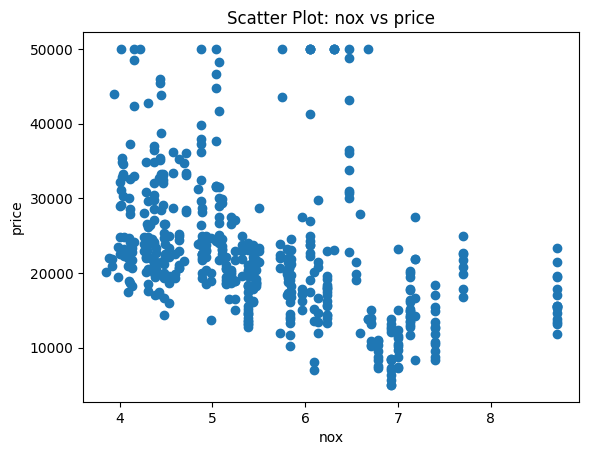

In [19]:
import statsmodels.api as sm

X = df['nox']
y = df['price']

X = sm.add_constant(X)  # Add a constant term to the predictor variable

model = sm.OLS(y, X).fit()  # Fit the linear regression model
r_squared = model.rsquared  # Get the R-squared value

print("R-squared:", r_squared)

plt.scatter(df['nox'], df['price'])
plt.xlabel('nox')
plt.ylabel('price')
plt.title('Scatter Plot: nox vs price')
plt.show()

# TO DO: comment the results

---
#### **9. Run a regression of price on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients.**

Interpretations

**All constant (intercept)**
- **Coefficient:** -18,680
- **Interpretation:** When all independent variables (crime, nox, rooms, proptax) are zero, the predicted value of the dependent variable (price) is -18,680. This may not have much sense.

**Variable "crime":**
- **Coefficient:** -136.5438
- **Interpretation:** Holding other variables constant, a one-unit increase in the "crime" variable is associated with a decrease in the predicted value of the price by 136.5438 units.

**Variable "nox":**
- **Coefficient:** -660.4672
- **Interpretation:** Holding other variables constant, a one-unit increase in the "nox" variable is associated with a decrease in the predicted value of the price by 660.4672 units.

**Variable "rooms":**
- **Coefficient:** 7797.9286
- **Interpretation:** Holding other variables constant, a one-unit increase in the "rooms" variable is associated with an increase in the predicted value of the price by 7797.9286 units.

**Variable "proptax":**
- **Coefficient:** -89.4144
- **Interpretation:** Holding other variables constant, a one-unit increase in the "proptax" variable is associated with a decrease in the predicted value of the price by 89.4144 units.

Question 9
Var(u|X) =  35953748.17
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           1.06e-91
Time:                        18:06:13   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868

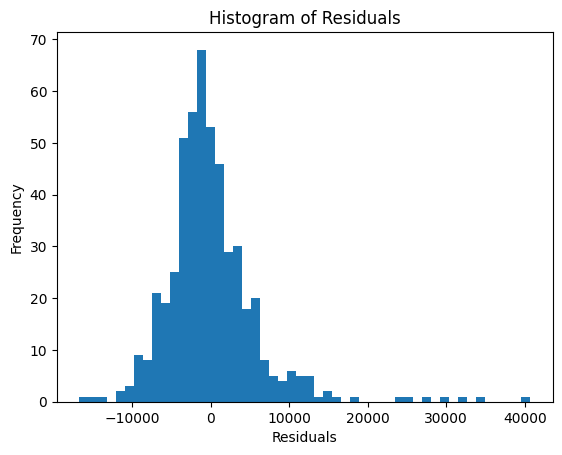

In [6]:
# Define the independent variables
X = df[['crime', 'nox', 'rooms', 'proptax']]
X = sm.add_constant(X)  # Add a constant column

# Define the dependent variable
y = df['price']

# Fit the regression model
model_fit_q9 = sm.OLS(y, X).fit()
residuals = model_fit_q9.resid

print('Question 9')
print('Var(u|X) = ', round(np.var(residuals), 2))
print(model_fit_q9.summary())

plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# TO DO: comment the results

TO DO: talk about big variance of u

Interpretations

**All constant (intercept)**: -18,680
- When all independent variables (crime, nox, rooms, proptax) are zero, the predicted value of the dependent variable (price) is -18,680. This may not have much sense.

**Variable "crime":**: -136.5438
- Holding other variables constant, a one-unit increase in the "crime" variable is associated with a decrease in the predicted value of the price by 136.5438 units.

**Variable "nox":**: -660.4672
- Holding other variables constant, a one-unit increase in the "nox" variable is associated with a decrease in the predicted value of the price by 660.4672 units.

**Variable "rooms":**: 7797.9286
- Holding other variables constant, a one-unit increase in the "rooms" variable is associated with an increase in the predicted value of the price by 7797.9286 units.

**Variable "proptax":**: -89.4144
- Holding other variables constant, a one-unit increase in the "proptax" variable is associated with a decrease in the predicted value of the price by 89.4144 units.

---
#### **10. Run a regression of lprice on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients.**


Question 10
Var(u|X) =  0.06
                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.50e-101
Time:                        18:06:13   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550  

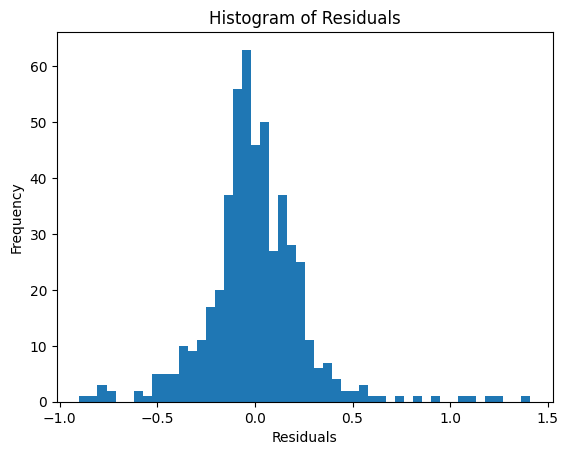

In [7]:
# Define the independent variables
X = df[['crime', 'nox', 'rooms', 'proptax']]
X = sm.add_constant(X)  # Add a constant column

# Define the dependent variable
Y = df['lprice']

# Fit the regression model
model_fit_q10 = sm.OLS(Y, X).fit()
residuals = model_fit_q10.resid

print('Question 10')
print('Var(u|X) = ', round(np.var(residuals), 2))
print(model_fit_q10.summary())

plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

Interpretations

**All constant (intercept)**: 8.6550
- When all independent variables (crime, nox, rooms, proptax) are zero, the predicted value of the price is 8.6550.

**Variable "crime"**: -0.0125
- Holding other variables constant, a one-unit increase in the "crime" variable is associated with a decrease in the predicted value of the price by 0.0125 units.

**Variable "nox"**: -0.0476
- Holding other variables constant, a one-unit increase in the "nox" variable is associated with a decrease in the predicted value of the price by 0.0476 units.

**Variable "rooms"**: 0.2816
- Holding other variables constant, a one-unit increase in the "rooms" variable is associated with an increase in the predicted value of the price by 0.2816 units.

**Variable "proptax"**: -0.0043
- Holding other variables constant, a one-unit increase in the "proptax" variable is associated with a decrease in the predicted value of the price by 0.0043 units.

---
#### **11. Run a regression of lprice on a constant, crime, lnox, rooms, lproptax. Comment on the histogram of the residuals. Interpret all coefficients.**

Question 11
Var(u|X) =  0.07
                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.8
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          2.71e-101
Time:                        18:06:13   Log-Likelihood:                -26.450
No. Observations:                 506   AIC:                             62.90
Df Residuals:                     501   BIC:                             84.03
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8553  

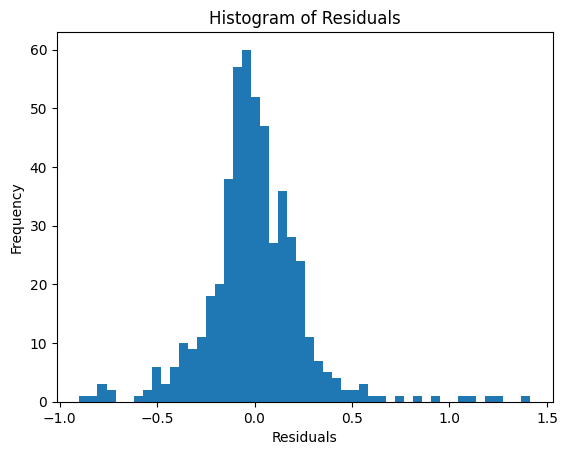

In [8]:
import statsmodels.api as sm

# Define the independent variables
X = df[['crime', 'lnox', 'rooms', 'proptax']]
X = sm.add_constant(X)  # Add a constant column

# Define the dependent variable
y = df['lprice']

# Fit the regression model
model_fit_q11 = sm.OLS(y, X).fit()
residuals = model_fit_q11.resid

print('Question 11')
print('Var(u|X) = ', round(np.var(residuals), 2))
print(model_fit_q11.summary())

plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

**All constant (intercept)**: 8.8553
- When all independent variables (crime, nox, rooms, proptax) are zero, the predicted value of the price is 8.8553.

**Variable "crime"**: -0.0125
- Holding other variables constant, a one-unit increase in the "crime" variable is associated with a decrease in the predicted value of the price by 0.0125 units.

**Variable "nox"**: -0.0476
- Holding other variables constant, a one-unit increase in the "nox" variable is associated with a decrease in the predicted value of the price by 0.0476 units.

**Variable "rooms"**: 0.2816
- Holding other variables constant, a one-unit increase in the "rooms" variable is associated with an increase in the predicted value of the price by 0.2816 units.

**Variable "proptax"**: -0.0042
- Holding other variables constant, a one-unit increase in the "proptax" variable is associated with a decrease in the predicted value of the price by 0.0042 units.

---
#### **12. In the specification of question 10, test the hypothesis H0: $\beta_{nox}$ <0 vs. H1: $\beta_{nox}$ > 0 at the 1% level.**

TO DO: add explanation
To DO: mention ': Given the observed value of the t statistic, what is the smallest
significance level at which the null hypothesis would be rejected? This level is known
as the p-value for the test'

' In order
to compute p-values, we either need extremely detailed printed tables of the t distribution—which is not very practical—or a computer program that computes areas
under the probability density function of the t distribution'

' If a regression package reports a
p-value along with the standard OLS output, it is almost certainly the p-value for testing the null hypothesis H0: j  0 against the two-sided alternative.'

In [9]:
#Get information from the model
beta_nox = model_fit_q10.params['nox']
se_nox = model_fit_q10.bse['nox']

# t-statistic
t_value = beta_nox / se_nox
deg_freedom = model_fit_q10.df_resid

# One-sided p-value
p_value_one_tailed = 1 - t.cdf(abs(t_value), deg_freedom)
alpha = 0.01

# Compare the p-value with the significance level
if p_value_one_tailed < alpha:
    print(f'Reject the null hypothesis. p-value: {p_value_one_tailed:.7f}')
else:
    print(
        f'Fail to reject the null hypothesis. p-value: {p_value_one_tailed:.7f}')

Reject the null hypothesis. p-value: 0.0002053


---
#### **13. In the specification of question 10, test the hypothesis H0: $\beta_{nox}$ = 0 vs. H1: $\beta_{nox}$ ≠ 0 at the 1% level using the p-value of the test.**

In [10]:
#Get information from the model
beta_nox = model_fit_q10.params['nox']
se_nox = model_fit_q10.bse['nox']

# t-statistic
t_value = beta_nox / se_nox

# Two-sided p-value
p_value_two_tailed = 2 * (1 - t.cdf(abs(t_value), deg_freedom))
alpha = 0.01

# Compare the p-value with the significance level
if p_value_two_tailed < alpha:
    print(f'Reject the null hypothesis. p-value: {p_value_two_tailed:.7f}')
else:
    print(
        f'Fail to reject the null hypothesis. p-value: {p_value_two_tailed:.7f}')

Reject the null hypothesis. p-value: 0.0004107


---
#### **14. In the specification of question 10, test the hypothesis H0: $\beta_{crime}$ = $\beta_{proptax}$ at the 10% level.**

In [11]:
#Get information from the model
beta_crime = model_fit_q10.params['crime']
beta_proptax = model_fit_q10.params['proptax']
se_crime = model_fit_q10.bse['crime']
se_proptax = model_fit_q10.bse['proptax']

# Get covariance matrix
cov_matrix = model_fit_q10.cov_params()
cov_crime_proptax = cov_matrix.loc['crime', 'proptax']

# Sqrt of the sum of squared standard errors minus 2 times the covariance
se_crime_minus_proptax = np.sqrt(se_crime**2 + se_proptax**2 - 2 * cov_crime_proptax)

# t-statistic
t_value = (beta_crime - beta_proptax) / se_crime_minus_proptax
deg_freedom = model_fit_q10.df_resid

# Two-sided p-value
p_value = 2 * (1 - t.cdf(abs(t_value), deg_freedom))
alpha = 0.1

# Compare the p-value with the significance level
if p_value < alpha:
    print(f'Reject the null hypothesis. p-value: {p_value:.7f}')
else:
    print(
        f'Fail to reject the null hypothesis. p-value: {p_value:.7f}')

Reject the null hypothesis. p-value: 0.0003202


---
#### **15. In the specification of question 10, test the hypothesis H0: $\beta_{crime}$ = 0, $\beta_{proptax}$ = 0 at the 10% level.** 

In [12]:
""" # Define X unrestricted and restricted
Xur = df[['crime', 'nox', 'rooms', 'proptax']]
Xur = sm.add_constant(Xur)

Xr = df[['nox', 'rooms']]
Xr = sm.add_constant(Xr)

Y = df['lprice']

modelUr = sm.OLS(Y, Xur).fit()
modelR = sm.OLS(Y, Xr).fit()

SSRur = modelUr.ssr
SSRr = modelR.ssr

alpha = 0.1
q = modelR.df_resid - modelUr.df_resid
n_k_1 = modelUr.df_resid

F = ((SSRr - SSRur) / q) / (SSRur / n_k_1)
man_p_value = 2 * (1 - f.cdf(F, q, n_k_1))
print(f'F-statistic: {man_p_value:.30f}') """

alpha = 0.1
hypothesis = '(proptax = 0), (nox = 0)'

p_value = model_fit_q10.f_test(hypothesis).pvalue

if p_value < alpha:
    print(f'Reject the null hypothesis. p-value: {p_value:.30f}')
else:
    print(
        f'Fail to reject the null hypothesis. p-value: {p_value:.30f}')

Reject the null hypothesis. p-value: 0.000000000000025293764225682351


---
#### **16. In the specification of question 10, test the hypothesis H0: $\beta_{crime}$ = -500, $\beta_{proptax}$ = -100 at the 10% level.**

In [21]:
# Define X unrestricted and restricted
Xur = df[['crime', 'nox', 'rooms', 'proptax']]
Xur = sm.add_constant(Xur)

Xr = df[['nox', 'rooms']]
Xr = sm.add_constant(Xr)

Yur = df['lprice']
Yr = df['lprice'] + 500*df['crime'] + 100*df['proptax']

modelUr = sm.OLS(Yur, Xur).fit()
modelR = sm.OLS(Yr, Xr).fit()

SSRur = modelUr.ssr
SSRr = modelR.ssr

alpha = 0.1
q = modelR.df_resid - modelUr.df_resid
n_k_1 = modelUr.df_resid

F = ((SSRr - SSRur) / q) / (SSRur / n_k_1)

print(F)
p_value = 1 - f.cdf(F, q, n_k_1)

""" alpha = 0.1
hypothesis = '(proptax = -100), (nox = -500)'

p_value = model_fit_q10.f_test(hypothesis).pvalue """

if p_value < alpha:
    print(f'Reject the null hypothesis. p-value: {p_value:.30f}')
else:
    print(
        f'Fail to reject the null hypothesis. p-value: {p_value:.30f}')

80013196057.37097
Reject the null hypothesis. p-value: 0.000000000000000111022302462516


---
#### **17. In the specification of question 10, test the hypothesis H0: $\beta_{crime}$ + $\beta_{proptax}$ = -1000 at the 10% level.** 

In [14]:
""" # Define X unrestricted and restricted
Xur = df[['crime', 'nox', 'rooms', 'proptax']]
Xur = sm.add_constant(Xur)

Xr_ = df[['nox', 'rooms']]
Xr_ = sm.add_constant(Xr_)

Yur = df['lprice']
Yr = df['lprice'] - 1000*(df['crime'] + df['proptax'])

modelUr = sm.OLS(Yur, Xur).fit()
modelR = sm.OLS(Yr, Xr).fit()

SSRur = modelUr.ssr
SSRr = modelR.ssr

alpha = 0.1
q = modelR.df_resid - modelUr.df_resid
n_k_1 = modelUr.df_resid

F = ((SSRr - SSRur) / q) / (SSRur / n_k_1)
p_value = 1 - f.cdf(F, q, n_k_1) """

alpha = 0.1
hypothesis = '(proptax + nox = -1000)'

p_value = model_fit_q10.f_test(hypothesis).pvalue

if p_value < alpha:
    print(f'Reject the null hypothesis. p-value: {p_value:.30f}')
else:
    print(
        f'Fail to reject the null hypothesis. p-value: {p_value:.30f}')

Reject the null hypothesis. p-value: 0.000000000000000000000000000000


---
#### **18. In the specification of question 10, test the hypothesis that all coefficients are the same for observations with low levels of nox vs. medium and high levels of nox.**

In [15]:
# Fit the models
low_nox = df[df['nox_category'] == 0]
medium_high_nox = df[df['nox_category'] != 0]

X_low = low_nox[['crime', 'nox', 'rooms', 'proptax']]
X_low = sm.add_constant(X_low)
Y_low = low_nox['lprice']

X_medium_high = medium_high_nox[['crime', 'nox', 'rooms', 'proptax']]
X_medium_high = sm.add_constant(X_medium_high)
Y_medium_high = medium_high_nox['lprice']

model_fit_low = sm.OLS(Y_low, X_low).fit()
model_fit_medium_high = sm.OLS(Y_medium_high, X_medium_high).fit()

#Get information from the model
betas_low = model_fit_low.params
betas_medium_high = model_fit_medium_high.params
ses_low = model_fit_low.bse
ses_medium_high = model_fit_medium_high.bse

""" # Get covariance matrix
cov_matrix = model_fit_q10.cov_params()
cov_crime_proptax = cov_matrix.loc['crime', 'proptax']

# Sqrt of the sum of squared standard errors minus 2 times the covariance
se_crime_minus_proptax = np.sqrt(se_crime**2 + se_proptax**2 - 2 * cov_crime_proptax)"""

# t-statistic
t_value = (betas_low - betas_medium_high) / ((ses_low**2 + ses_medium_high**2)**0.5)
deg_freedom = model_fit_low.df_resid

# Two-sided p-value
p_values = 2 * (1 - t.cdf(abs(t_value), deg_freedom))
alpha = 0.1

results = pd.DataFrame({'t_value': t_value, 'p_value': p_values}, index=model_fit_low.params.index)
results['significant'] = results['p_value'] < alpha

""" # Compare the p-value with the significance level
if p_value < alpha:
    print(f'Reject the null hypothesis. p-value: {p_value:.7f}')
else:
    print(
        f'Fail to reject the null hypothesis. p-value: {p_value:.7f}') """
        
print(results)

          t_value       p_value  significant
const   -3.773149  2.527600e-04         True
crime   -0.631294  5.290587e-01        False
nox      0.780159  4.368463e-01        False
rooms    5.941542  2.878224e-08         True
proptax  0.344873  7.307987e-01        False


---
#### **19. Repeat the test of question 18 but now assuming that only the coefficients of nox and proptax can change between the two groups of observations. State and test H0.** 

## PART 2 - HETEROSKEDASTICITY 
---
#### **20. Explain the problem of heteroskedasticity with an example of the course.** 

Firstly, under homoskedasticity, the variances of the error term $u$ and the dependent variable $y$ are assumed to be constant, *i.e.*, 

$$
Var(u|x) = Var(y|x) = \sigma^{2}
$$

However, under heteroskedasticity conditions, what happens is that the variance of the error $Var(u|x)$ depends on the independent variable $x$. Consequently, the variance of $y$ $Var(y|x)$ will also depend on $x$. This violation of the homoskedasticity assumption can lead to issues, such as biased standard errors and inefficient parameter estimates in Ordinary Least Squares regression.

In the example studied in course, the examination of the education-wage relationship underscores the challenge posed by heteroskedasticity. The quest for an unbiased estimation of education's impact on wages necessitates the assumption $E(u|educ) = 0$, accompanied by the assumption of homoskedasticity $Var(u∣educ) = \sigma^{2}$. This implies constant wage variance $Var(wage∣educ) = \sigma^{2}$ across education levels, allowing for varying mean wages while assuming consistent variance. However, the realism concern is acknowledged: higher education levels may introduce greater wage variability due to diverse job opportunities, contrasting with lower variability at lower education levels.

Expanding on this, assume we build a model assuming homoskedasticity, implying constant error term variance across education levels. In the real world, individuals with higher education may experience more diverse work opportunities, leading to increased wage variability. Conversely, those with lower education levels may face fewer opportunities, resulting in reduced wage variability. Thus, insisting on homoskedasticity introduces bias into the model, as it overlooks the varying wage volatility associated with different education levels.

---
#### **21. Suppose that $ E(u u')= \sigma^2 \Omega$. Show that the GLS estimator is the best linear unbiased estimator.**

Fistly, considering the model $y = X \beta + u$, where $E(u|X) = 0$, we derive the expression of the OLS estimator of $\beta$, called $b$. Considering a set of $n$ i.i.d. observations, the collected data is represented by the following esquation:

$$
y = X b + u \quad \quad \quad \quad (12)
$$

By expliciting the matrix notation of the equation (12), we obtain the following equivalent equation:

$$
\begin{bmatrix}
y_{1}\\
y_{2}\\
\vdots\\
y_{N}
\end{bmatrix} = \begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1K}\\ 
x_{21} & x_{21} & \cdots & x_{2K}\\ 
\vdots & \vdots & \ddots & \vdots\\ 
x_{N1} & x_{N2} & \cdots & x_{NK} 
\end{bmatrix}
\begin{bmatrix}
b_{1}\\
b_{2}\\
\vdots\\
b_{K}
\end{bmatrix}
+
\begin{bmatrix}
u_{1}\\
u_{2}\\
\vdots\\
u_{N}
\end{bmatrix}
$$

In order to derive an expression for $b$, we minimize sum of the squared residuals, i.e., we minimize

$$
u' u = \begin{bmatrix}
u_{1}\ u_{2}\ \cdots\ u_{N}
\end{bmatrix} \begin{bmatrix}
u_{1}\\
u_{2}\\
\vdots\\
u_{N}
\end{bmatrix}= \sum_{i=1}^{N} u_{i}^{2}
$$

To that, it is first necessary to isolate the expression of $u$ and then, compute its transpose, so that the product $u' u$ can be minimized. From the equation (12), is given by:

$$
u = y - X b \Rightarrow u' = (y - X b)' = y' - b' X'
$$

Thus, the product to be minimized is:

$$
u' u = (y' - b' X')(y - X b) = y'y - y'Xb - b'X'y + b'X'Xb 
$$

By noting that $b'X'y = (b'X'y)' = y'Xb$, we arrive in the following expression:

$$
\text{min } u'u = y'y - 2b'X'y + b'X'Xb \quad \quad (13)
$$

Finally, what is necessary to do is to take the partial derivative of the equation $(13)$ with respect to $b$ and solve it when it is equal to zero. To that, we use the two following results:

$$
\left\{\begin{matrix}
\frac{\partial}{\partial b} (b'X'y) = X'y \\ 
\frac{\partial}{\partial b} (b'X'Xb) = 2X'Xb 
\end{matrix}\right.
$$

With the above, the equation to be solved for $b$ will be:

$$
\frac{\partial}{\partial b} (u'u) = 0 \iff -2X'y + 2X'Xb = 0 \iff X'Xb = X'y \iff b = (X'X)^{-1}X'y \quad (14)
$$

Now that the estimator has been computed as shown in the equation $(14)$, to shown that it is the best linear unbiased estimator (BLUE), we first check that it is linear. Indeed, the linearity is checked immediately by seeing the linear relatioship between $b$ and the dependent variable $y$. The second step is to show its unbiasedness. To that, we compute its expected value.

$$
E(b) = E\left((X'X)^{-1}X'y\right) = (X'X)^{-1}X'E(y) \quad \quad (15)
$$

Since the assumption $E(u|X) = 0$ holds, then $E(y) = X \beta$ and the equation $(15)$ can be written as follows, proving that the estimator $b$ is unbiased.

$$
E(b) = (X'X)^{-1}(X'X) \beta \iff E(b) = \beta
$$

Now, for the next steps, it is useful to rewrite the expression of $b$ as follows:

$$
\left.\begin{matrix}
y = X \beta + u \\ 
b = (X'X)^{-1}X'y
\end{matrix}\right\}\Rightarrow 
b = \beta + (X'X)^{-1}X'u \quad \quad (16)
$$

With the equation $(16)$, we compute the variance of the estimator considering the Heteroskedasticity supposition that $Var(u) = E(uu') = \sigma^{2}\Omega$.

$$
\begin{align*}
Var(b) &= Var\left(\beta + (X'X)^{-1}X'u\right) \\
       &= Var\left((X'X)^{-1}X'u\right) \\
       &= (X'X)^{-1}X' Var(u) X(X'X)^{-1} \\
       &= (X'X)^{-1}X' \sigma^{2} \Omega X(X'X)^{-1}\\
\end{align*}
$$

Therefore, the equation $(17)$ contains the result of the variance of the estimator, considering Heteroskedasticity.

$$
Var(b) = \sigma^{2} (X'X)^{-1}X' \Omega X(X'X)^{-1} \quad \quad (17)
$$





---
#### **22. In the specification of question 9, test the hypothesis of no heteroskedasticity of linear form, i.e. in the regression of u2 on constant, crime, nox, rooms, proptax, test H0: crime, nox, room, proptax = 0, where the coefficients k (k = crime, nox, rooms, proptax) are associated with the corresponding explanatory variables.** 

Answer: We can use the Breusch-Pagan test from the statsmodels library in Python to test for heteroskedasticity

In [22]:
bp_test = het_breuschpagan(model_fit_q9.resid, model_fit_q9.model.exog)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

print(dict(zip(labels, bp_test)))

hypothesis = '(proptax = 0), (nox = 0), (rooms = 0), (crime = 0)'

p_value = model_fit_q10.f_test(hypothesis).pvalue
p_value

{'Lagrange multiplier statistic': 26.05277409989704, 'p-value': 3.0878614376621725e-05, 'f-value': 6.7988932530913235, 'f p-value': 2.4672073438899615e-05}


2.4961069561716696e-101

---
#### **23. In the specification of question 10, test the hypothesis of no heteroskedasticity of linear form**

In [17]:
bp_test = het_breuschpagan(model_fit_q10.resid, model_fit_q10.model.exog)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 63.535963915713026, 'p-value': 5.233478331092148e-13, 'f-value': 17.985370180294435, 'f p-value': 8.203474299970575e-14}


---
#### **24.  In the specification of question 11, test the hypothesis of no heteroskedasticity of linear form**

In [18]:
bp_test = het_breuschpagan(model_fit_q11.resid, model_fit_q11.model.exog)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 63.50819882332358, 'p-value': 5.304390768031135e-13, 'f-value': 17.97638257131294, 'f p-value': 8.32991112839275e-14}


---
#### **25. Comment on the differences between your results of questions 22,23, 24.**

TO DO: complete

---
#### **26. Regardless of the results of the test of question 22, identify the most significant variable causing heteroskedasticity using the student statistics and run a WLS regression with the identified variable as weight.**

In [27]:
X = df[['crime', 'nox', 'rooms', 'proptax']]
X = sm.add_constant(X)
Y = df['lprice']

# Run OLS regression
model = sm.OLS(Y, X)
results = model.fit()

# Get residuals
residuals = results.resid

# Assume 'var1' is the variable causing heteroskedasticity
weights = 1. / df['proptax']**2

# Run WLS regression
model_wls_fit = sm.WLS(Y, X, weights=weights).fit()

bp_test = het_breuschpagan(model_wls_fit.resid, model_wls_fit.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 71.29912502085595, 'p-value': 1.2068700621893692e-14, 'f-value': 20.543357335755665, 'f p-value': 1.0886634123142197e-15}


## PART 3 - TIME SERIES DATA

---
#### **27. Define strict and weak stationarity.**

* **Strict stationarity:** A time series process is considered strictly stationary if the joint probability distribution of its observations remains invariant under shifts in time. In other words, for any set of time points, the entire probability distribution of the data, including the mean, variance, and higher-order moments, remains constant. This implies that all statistical properties of the time series are unchanged over time, making strict stationarity a more stringent condition compared to covariance stationarity, for example.


* **Weak stationarity:** A time series process is said to be weak stationary if it presents constants mean, variance and autocorrelation structutre over time, but not its entire probability distribution. 